In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('preprocessed_data.csv')

In [3]:
cols = list(df.columns)

num_cols = df._get_numeric_data().columns
categorical_columns = df['Outcome'].name
print("Categorical Columns")
print("--------------------")
print(categorical_columns)


cols.remove(categorical_columns)
num_cols = list(cols)
print("Numeric Columns")
print("--------------------")
for x in num_cols:
    print(x)
print("\n")

Categorical Columns
--------------------
Outcome
Numeric Columns
--------------------
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age




In [4]:
df_numeric = pd.DataFrame()
for x in num_cols:
    df_numeric[x] = df[x]
print(df_numeric)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35       80  33.6   
1              1       85             66             29       80  26.6   
2              8      183             64             21       80  23.3   
3              1       89             66             23       94  28.1   
4              4      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27       80  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             21       80  30.1   
767            1       93             70             31       80  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [5]:
df_categorical = pd.DataFrame()
df_categorical[categorical_columns] = df[categorical_columns]
print(df_categorical)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


### Feature Selection

######  Pearson Correlation

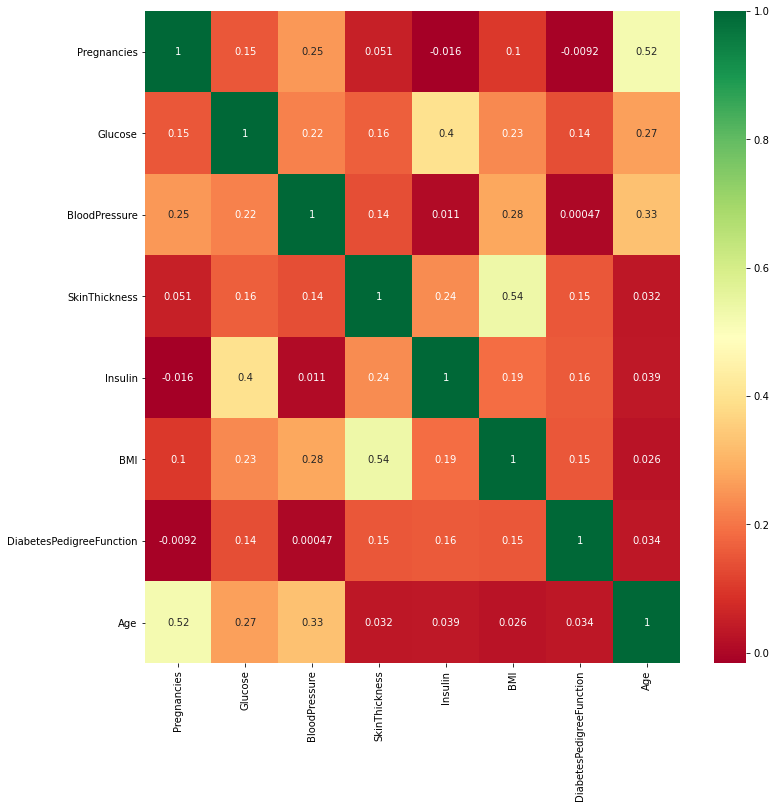

In [6]:
import seaborn as sns

corrmat = df_numeric.corr()
top_corr_features = corrmat.index

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
# PLOT THE HEAT MAP
g=sns.heatmap(df_numeric.corr(),annot=True,cmap="RdYlGn")

In [7]:
def correlation(dataset, min_threshold,max_threshold):
    col_corr = dict()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) > min_threshold) and (abs(corr_matrix.iloc[i, j]) < max_threshold): # we are interested in absolute coeff value
                colvalue = corr_matrix.iloc[i, j]  # getting the name of column
                colname = corr_matrix.columns[i] 
                col_corr[colvalue] = colname
    return col_corr

In [8]:
corr_features = correlation(df_numeric, -0.3,0.4)
len(dict(corr_features))

26

In [9]:
drop_corr_col = set(num_cols)-set(corr_features.values())
print(drop_corr_col)

{'Pregnancies'}


In [10]:
x=df_numeric.drop(drop_corr_col,axis=1)

In [11]:
print(x)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35       80  33.6   
1         85             66             29       80  26.6   
2        183             64             21       80  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27       80  36.8   
765      121             72             23      112  26.2   
766      126             60             21       80  30.1   
767       93             70             31       80  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

### Merging Dataframe Numeric and Categorical

In [12]:
df_numeric_categorical = pd.concat([x,df_categorical],axis = 1)

In [13]:
print(df_numeric_categorical)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35       80  33.6   
1         85             66             29       80  26.6   
2        183             64             21       80  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27       80  36.8   
765      121             72             23      112  26.2   
766      126             60             21       80  30.1   
767       93             70             31       80  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33   

In [14]:
df_numeric_categorical.to_csv("Feature_selected.csv",index=False)